<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-05-07 11:50:48
-------------------
qualified stocks: 97
with latest results: 90
still star stocks: 48
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  2.11 L
Current:  1.21 C
-------------------
Today PnL: 26.72 K (0.22%)
Current PnL: -22.06 L (-15.64%)
CY Booked + Current PnL: -20.04 L (-14.21%)
-------------------
Total profit:  3.38 L
Total loss:  -25.44 L
-------------------
Total Booked + Current PnL: 6.94 L (6.08%)
Total Booked PnL: 28.99 L (25.42%)
Curr Year Booked PnL: 2.01 L (1.67%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.03 C
Est FTT PnL: 82.57 L (68.42%)
-------------------
Est LTT:  2.64 C
Est LTT PnL: 1.44 C (118.99%)
Deployed:  1.14 C
Current:  1.21 C
CAGR/XIRR %: 4.09%


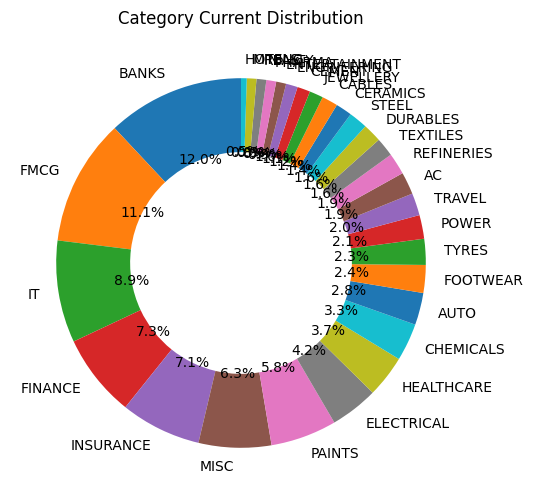

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,CumlRnk,Criteria,Strategy,Category
34,HDFCBANK,1561.04,2170.00,3.67,X-LC,73.20,102491.0,19756.0,12514.0,0.11,...,12.21,39.01,4.0,1.58,0.86,35.42,110.0,X40,BTT,BANKS
73,SBILIFE,1496.49,1924.99,-1.43,H-LC,90.72,146496.0,20791.0,15206.0,1.04,...,10.38,28.63,NaN,1.37,1.24,30.51,90.0,AR,ATH,INSURANCE
60,PIDILITIND,2504.06,3576.00,-13.58,X-LC,40.21,90138.0,15016.0,17144.0,-0.99,...,19.02,42.81,10.0,0.88,0.76,13.04,29.0,X40,BTT,CHEMICALS
66,RELIANCE,1288.53,1526.00,4.05,X-LC,95.88,223918.0,20330.0,17197.0,-0.26,...,7.68,18.43,67.0,1.18,1.89,21.97,96.0,XY25,NTT,REFINERIES
35,HDFCLIFE,562.05,897.00,-5.01,H-LC,68.04,90506.0,20250.0,21622.0,0.20,...,23.89,59.59,16.0,0.94,0.76,35.94,115.0,X40,BTT,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,RBLBANK,230.61,388.00,31.28,M-SC,87.63,203302.0,-30998.0,190901.0,1.48,...,93.90,68.25,-48.0,-0.16,1.71,33.88,1.0,XY24,NTT,BANKS
69,SAIL,130.64,228.00,70.51,M-MC,60.31,194328.0,-30634.0,198292.0,1.15,...,102.04,74.53,-18.0,-0.15,1.64,12.83,1.0,XY24,BTT,STEEL
67,REPCOHOME,515.07,880.00,-59.76,H-SC,77.32,149628.0,-55370.0,200606.0,-0.07,...,134.07,70.85,-44.0,-0.28,1.26,20.79,1.0,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-38.37,H-SC,72.16,184672.0,-63858.0,279335.0,1.11,...,151.26,86.70,-29.0,-0.23,1.56,22.17,1.0,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,CumlRnk,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,117.55,H-SC,20.62,117803.0,-69129.0,150305.0,-1.14,...,127.59,43.43,20.0,-0.46,0.99,12.70,92.0,X40N,BTT,FINANCE
2,ABB,5319.37,8953.12,-40.46,H-LC,69.07,135112.0,2128.0,88715.0,1.32,...,65.66,68.31,NaN,0.02,1.14,10.17,2.0,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,3.24,M-LC,91.75,182265.0,31059.0,34612.0,0.73,...,18.99,43.43,NaN,0.90,1.54,26.34,38.0,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-18.31,X-SC,35.05,73036.0,-27927.0,123365.0,0.15,...,168.91,94.53,-59.0,-0.23,0.62,8.28,22.0,SR,ATH,CHEMICALS
6,ANGELONE,2328.67,3033.00,-6.41,H-SC,74.23,152464.0,1100.0,44687.0,2.01,...,29.31,30.25,77.0,0.02,1.29,20.67,67.0,X40N,NTT,FINANCE
7,ASIANPAINT,2961.56,4250.00,-29.40,X-LC,21.65,162092.0,-39294.0,126902.0,-1.42,...,78.29,43.51,-18.0,-0.31,1.37,11.80,27.0,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,39.18,125282.0,-3870.0,90942.0,0.93,...,72.59,67.42,-12.0,-0.04,1.06,21.85,49.0,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-33.51,M-SC,22.68,100015.0,-28655.0,73951.0,-0.17,...,73.94,35.20,-8.0,-0.39,0.84,2.04,20.0,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-18.68,H-MC,58.76,174508.0,-2549.0,41044.0,1.33,...,23.52,21.75,-14.0,-0.06,1.47,24.83,89.0,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.91,X-LC,49.48,214800.0,18682.0,43046.0,-0.44,...,20.04,31.47,239.0,0.43,1.81,17.37,71.0,AR,ATH,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,CumlRnk,Criteria,Strategy,Category
3,ACC,2579.05,3906.0,-37.64,M-MC,6.19,134291.0,-53980.0,150849.0,-0.50,...,112.33,51.45,-37.0,-0.36,1.13,1.16,0.0,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.0,3.24,M-LC,91.75,182265.0,31059.0,34612.0,0.73,...,18.99,43.43,NaN,0.90,1.54,26.34,38.0,XY24,NTT,MISC
9,ATULAUTO,624.44,844.0,3316.22,M-SC,12.37,106495.0,-40873.0,92693.0,-0.75,...,87.04,35.16,-49.0,-0.44,0.90,8.77,1.0,XY24,NTT,AUTO
10,AWL,361.39,485.0,-69.22,H-MC,9.28,135265.0,-50851.0,114515.0,1.61,...,84.66,34.20,-36.0,-0.44,1.14,11.41,1.0,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.0,-38.37,H-SC,72.16,184672.0,-63858.0,279335.0,1.11,...,151.26,86.70,-29.0,-0.23,1.56,22.17,1.0,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.0,-18.68,H-MC,58.76,174508.0,-2549.0,41044.0,1.33,...,23.52,21.75,-14.0,-0.06,1.47,24.83,89.0,XY24,NTT,PAINTS
17,CAMPUS,294.86,393.0,NaN,NaN,29.90,136714.0,-31061.0,86909.0,-1.38,...,63.57,33.28,-16.0,-0.36,1.15,5.85,0.0,XY24,NTT,FOOTWEAR
22,DABUR,505.20,735.0,-14.74,X-MC,53.61,187922.0,-9106.0,98734.0,0.26,...,52.54,45.49,1.0,-0.09,1.59,6.75,43.0,XY24,BTT,FMCG
26,EASEMYTRIP,18.12,26.4,21.32,M-SC,28.87,116803.0,-60012.0,140806.0,-1.48,...,120.55,45.70,-91.0,-0.43,0.99,8.42,0.0,XY24,NTT,TRAVEL
28,GICRE,340.22,583.0,2.32,H-MC,60.31,97098.0,17487.0,39325.0,1.58,...,40.50,71.36,109.0,0.44,0.82,32.61,108.0,XY24,BTT,INSURANCE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,CumlRnk,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,18.15,M-SC,100.00,74741.0,-6595.0,78732.0,2.81,...,105.34,88.69,-8.0,-0.08,0.63,26.03,0.0,XR,NTT,CHEMICALS
2,ABB,5319.37,8953.12,-40.46,H-LC,69.07,135112.0,2128.0,88715.0,1.32,...,65.66,68.31,NaN,0.02,1.14,10.17,2.0,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-18.31,X-SC,35.05,73036.0,-27927.0,123365.0,0.15,...,168.91,94.53,-59.0,-0.23,0.62,8.28,22.0,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,4777.78,M-SC,30.93,53529.0,-40281.0,116897.0,-0.74,...,218.38,81.67,-16.0,-0.34,0.45,3.66,0.0,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,39.18,125282.0,-3870.0,90942.0,0.93,...,72.59,67.42,-12.0,-0.04,1.06,21.85,49.0,XR,NTT,BANKS
15,BRITANNIA,4902.95,6446.05,8.91,X-LC,49.48,214800.0,18682.0,43046.0,-0.44,...,20.04,31.47,239.0,0.43,1.81,17.37,71.0,AR,ATH,FMCG
16,BSOFT,628.85,844.81,-27.96,M-SC,78.35,67821.0,-42228.0,80022.0,0.85,...,117.99,34.34,-28.0,-0.53,0.57,11.65,1.0,XR,ATH,IT
18,CAMS,3643.00,5250.99,-8.77,H-SC,23.71,100884.0,-1120.0,46144.0,-0.14,...,45.74,44.14,261.0,-0.02,0.85,18.04,1.0,XR,ATH,MISC
20,COFFEEDAY,59.14,80.00,-59.76,L-SC,63.92,59021.0,-54528.0,94581.0,-2.01,...,160.25,35.27,NaN,-0.58,0.50,44.45,0.0,XR,NTT,HOTELS
23,DEN,52.79,75.00,78.76,L-SC,51.03,50032.0,-34432.0,69970.0,-1.33,...,139.85,42.07,-21.0,-0.49,0.42,6.25,1.0,AR,NTT,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.34
1,20,33.69
2,30,46.37


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,36.09
X40,15.18
X40N,13.71
AR,13.00
XR,10.31
XY25,9.42
X200,1.15
SR,1.15


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.90
X-LC,17.64
M-SC,16.00
X-MC,8.06
M-LC,7.99
M-MC,7.60
H-MC,7.19
H-LC,6.31
X-SC,2.56


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.52
X40       X-LC          7.88
XY24      M-SC          6.69
X40N      H-SC          5.93
XY25      X-LC          5.36
XY24      M-LC          4.98
          M-MC          4.95
X40N      M-SC          3.68
XY24      H-MC          3.43
AR        X-LC          3.25
          H-LC          3.24
XY24      X-MC          3.13
XR        H-SC          3.04
          M-SC          2.80
AR        X-MC          2.27
X40       H-SC          2.00
          M-SC          1.78
XY25      M-LC          1.74
X40       H-LC          1.59
X40N      X-MC          1.56
XY25      H-LC          1.48
AR        H-SC          1.41
X40N      H-MC          1.39
XR        M-LC          1.27
X40N      X-SC          1.15
X200      X-LC          1.15
AR        H-MC          1.14
X40       X-MC          1.10
XR        M-MC          1.06
          L-SC          0.95
XY24      L-SC          0.87
XY25      M-MC          0.84
X40       H-MC          0.83
XR        X-SC          0.79
AR        M-MC          0.75
SR        X-SC          0.62
          M-SC          0.53
AR        M-SC          0.52
          L-SC          0.42
XR        H-MC          0.40
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,11.99,-11.85,66.13
FMCG,11.06,-2.86,34.35
IT,8.93,-28.72,96.11
FINANCE,7.26,-28.57,86.59
INSURANCE,7.06,-1.66,38.73
MISC,6.34,-36.93,86.48
PAINTS,5.78,-20.08,55.62
ELECTRICAL,4.21,-11.68,68.59
HEALTHCARE,3.68,-6.60,41.02


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,70.11,8310602.0,-13.55,-1125707.0,59.31,4928929.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,64.96,7700404.0,-9.09,-699838.0,50.11,3858926.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3284827.0
XR,1324707.0
X40N,1273318.0
AR,1105595.0
X40,800595.0
SR,208639.0
XY25,178016.0
X200,81071.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2373735.0
M-SC,2022859.0
X-LC,765131.0
M-MC,690872.0
H-MC,405768.0
X-SC,374399.0
M-LC,369575.0
X-MC,349909.0
L-SC,332213.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          981838.0
          M-SC          822760.0
X40N      H-SC          593559.0
XY24      M-MC          487037.0
XR        M-SC          453823.0
X40       X-LC          404950.0
X40N      M-SC          399156.0
AR        H-SC          393541.0
XR        H-SC          314582.0
XY24      M-LC          236527.0
          H-MC          194884.0
AR        X-LC          194338.0
X40       M-SC          166963.0
XR        L-SC          166820.0
AR        H-LC          157104.0
XY24      X-MC          141863.0
XR        X-SC          132675.0
SR        X-SC          123365.0
X40N      X-SC          118359.0
          X-MC          116454.0
XR        M-LC          110143.0
XY24      L-SC           95423.0
AR        M-SC           94883.0
XR        M-MC           90942.0
X40       H-SC           90215.0
AR        M-MC           87084.0
SR        M-SC           85274.0
XY25      X-LC           84772.0
X200      X-LC           81071.0
AR        H-MC           76641.0
          L-SC           69970.0
X40       X-MC           59558.0
XR        H-MC           55722.0
X40       H-LC           46178.0
X40N      H-MC           45790.0
XY25      H-LC           44530.0
X40       H-MC           32731.0
AR        X-MC           32034.0
XY25      M-MC           25809.0
          M-LC           22905.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,21
M-SC,20
X-LC,13
M-MC,7
H-MC,7
H-LC,6
X-MC,6
M-LC,6
X-SC,4
